### Import

In [2]:
# import sys
# sys.path.append('../')
# sys.path.append('../ride/')

from ride.plot_functions import plot_city_results, plot_theoretical_acceleration
from ride import city_tests
from ride.utils import DataGetter
from ride import graph_generator

### Graph download

In [3]:
id = "44915"  # or 'R{id}'
graph = DataGetter.download_graph(id=id)

### Viewing the theoretical acceleration for a graph

Visually select the “alpha” range for testing

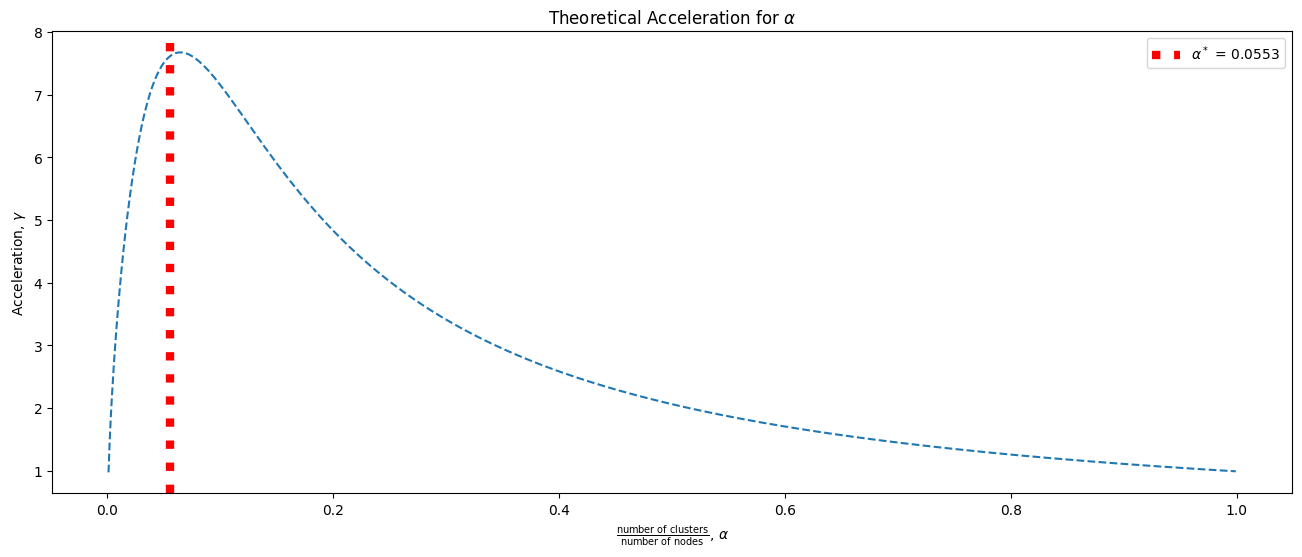

In [4]:
N = graph.number_of_nodes()
plot_theoretical_acceleration(N, (16, 6))

### Graph testing

The important thing here is to pick the “resolution” parameter. See logs.

In [5]:
cityResult = city_tests.test_graph(
    graph, f"{id}", id, logs=False, alg="dijkstra", alpha_range=(0.04, 0.1)
)

### Output of the test results. 
The values in the dots are “resolution”

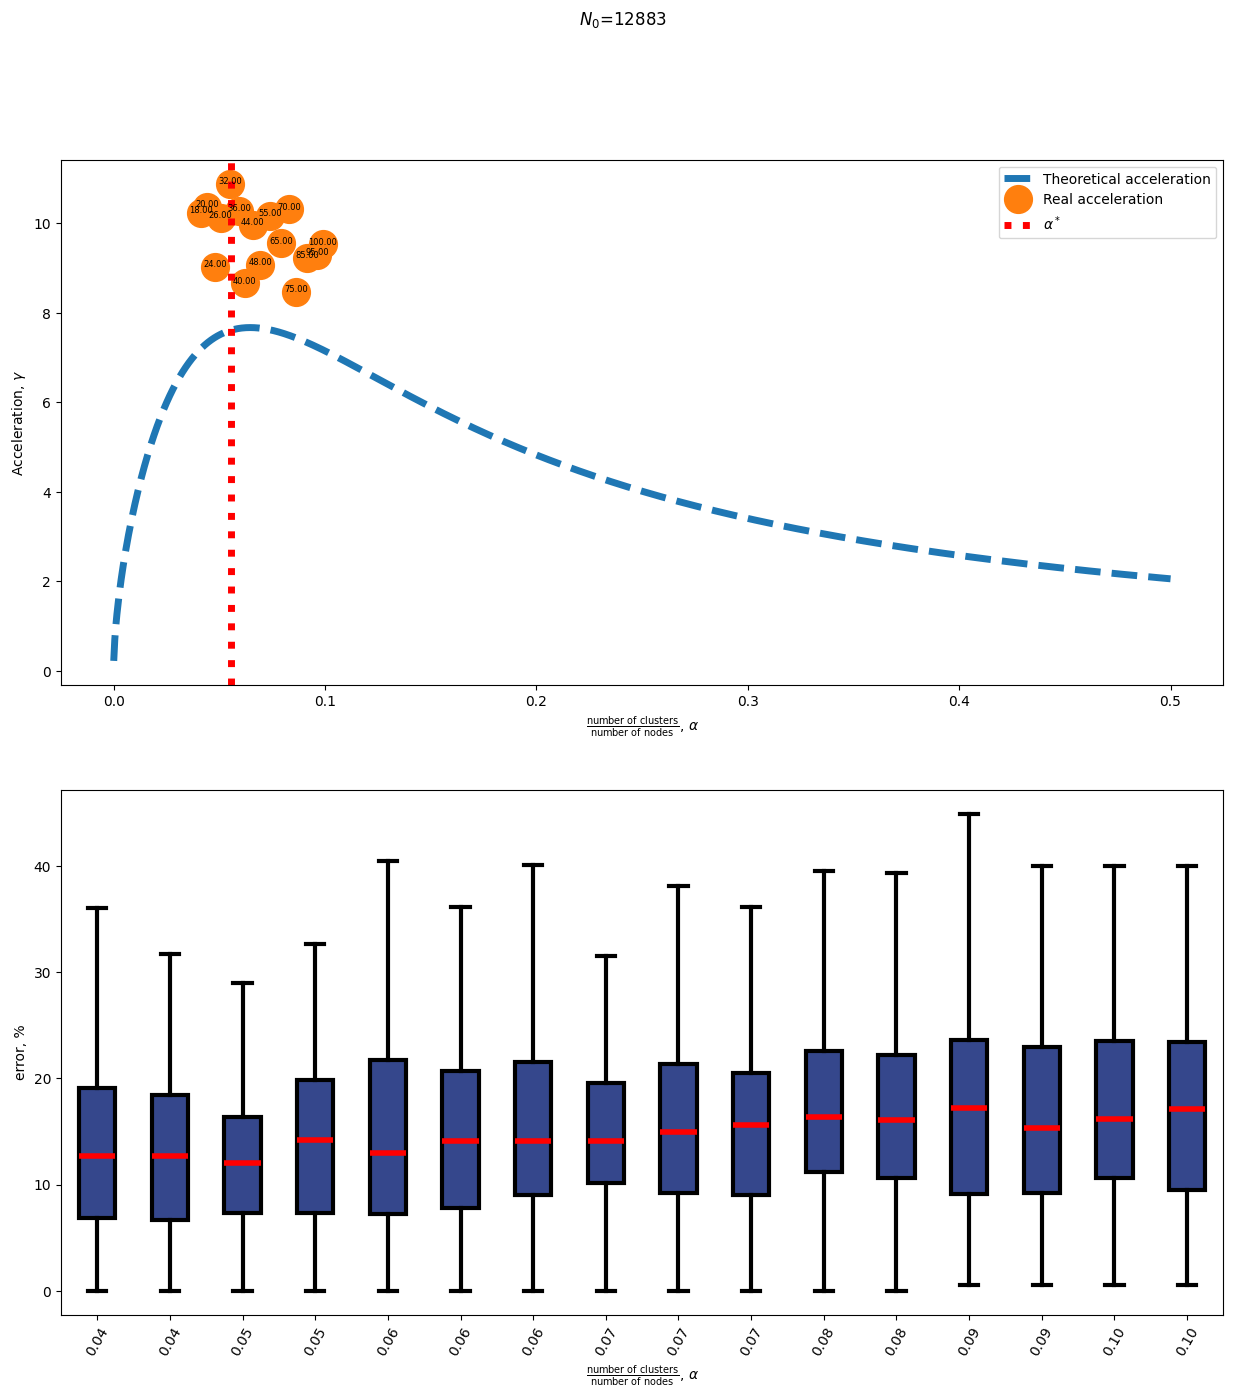

In [6]:
plot_city_results(cityResult, cityResult.nodes, alpha_threshold=None, max_alpha=0.5)

### Creating the object to be searched.

In [7]:
graphModel = graph_generator.generate_layer(graph, resolution=32)

### Select the id of the nodes (click to display the number) for which you want to find the path.
The HTML file is also saved.

In [ ]:
graphModel.draw_graph(visible=True)

### Final distance, path by node and map display (map optional)

In [ ]:
# distance, path = new_graph.find_path(1407722824, 1989926991, draw_path=True, visible=False)
from_node = 2791569568
to_node = 1666166594
distance, path, maps = graphModel.find_path(
    from_node, to_node, draw_path=True, visible=True
)
maps

### Compare:

In [ ]:
import networkx as nx

distance, path = nx.single_source_dijkstra(graphModel.graph, from_node, to_node, weight='length')
graphModel.draw_path(nodes=path, visible=True)